<a href="https://colab.research.google.com/github/manucastilla/iris_dectection/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
!git clone https://github.com/lucianosilva-github/G6_iris_recognition.git

Cloning into 'G6_iris_recognition'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 31 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [3]:
import G6_iris_recognition

In [4]:
!git clone https://github.com/lucianosilva-github/images-tutorial.git

Cloning into 'images-tutorial'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 23 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), done.


## Limpando as imagens

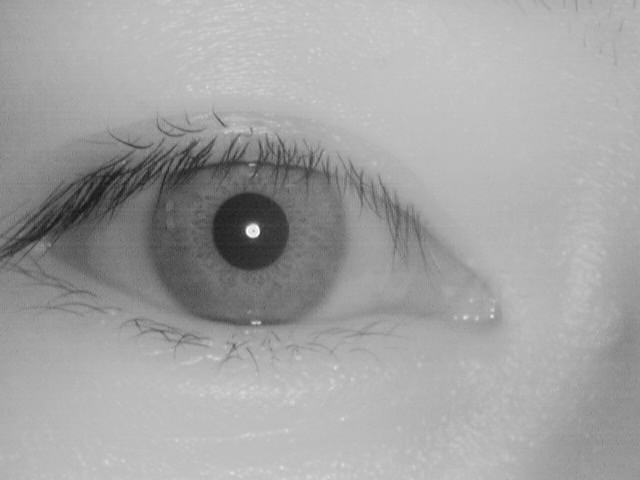

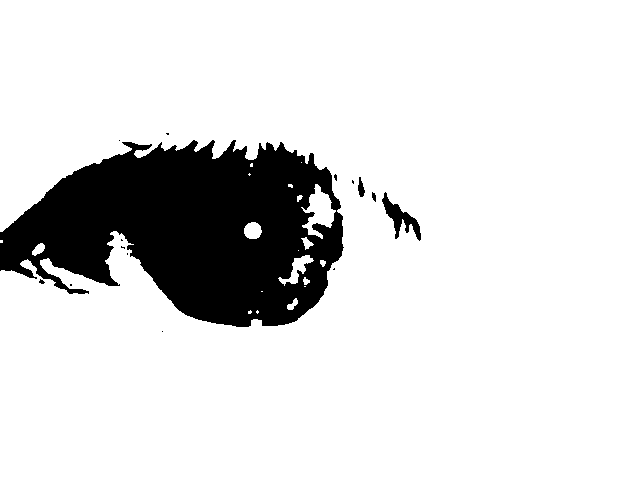

In [5]:
img = cv2.cvtColor(cv2.imread("images-tutorial/0002/0002_001.bmp"), cv2.COLOR_BGR2GRAY)
img_copy = img.copy()
img_copy = cv2.equalizeHist(img_copy)
blur = cv2.blur(img_copy, (5,5))
T, img_copyt1 = cv2.threshold(blur,35,255,cv2.THRESH_BINARY)


cv2_imshow(img)
cv2_imshow(img_copyt1)


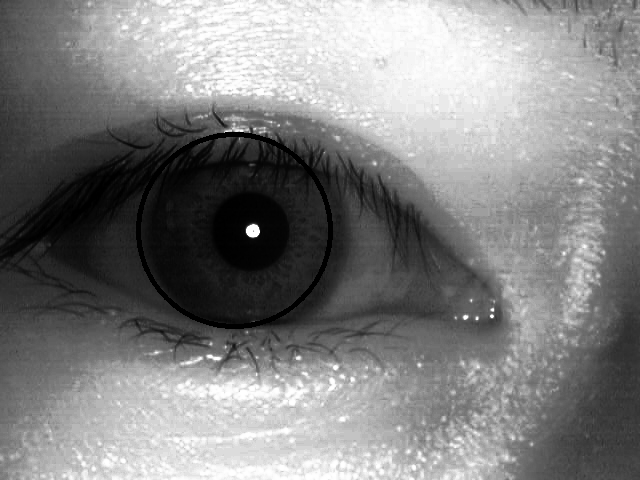

In [8]:
edges = cv2.Canny(img_copyt1,20,220)
hough_circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,500,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

#https://www.pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/
# ensure at least some circles were found
if hough_circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
  circles = np.round(hough_circles[0, :]).astype("int")
	
  # loop over the (x, y) coordinates and radius of the circles
  for (x, y, r) in circles:
		# draw the circle in the output image
		# corresponding to the center of the circle
    cv2.circle(img_copy, (x, y), r, (0, 255, 0), 4)
    # cv2.circle(img_copy, (x, y), r, (0, 255, 0), 4)
    
  # show the output image
  # cv2.imshow("output", np.hstack([img, img_copy]))
    
    cv2_imshow(img_copy)

In [9]:
import G6_iris_recognition
G6_iris_recognition.iris_model_train("images-tutorial","model.pickle")

directory_list ['images-tutorial/.git/refs/remotes/origin', 'images-tutorial/.git/refs/heads', 'images-tutorial/.git/refs/remotes', 'images-tutorial/.git/refs/tags', 'images-tutorial/.git/logs/refs/remotes/origin', 'images-tutorial/.git/logs/refs/heads', 'images-tutorial/.git/logs/refs/remotes', 'images-tutorial/.git/logs/refs', 'images-tutorial/.git/objects/b1', 'images-tutorial/.git/objects/6a', 'images-tutorial/.git/objects/f5', 'images-tutorial/.git/objects/76', 'images-tutorial/.git/objects/32', 'images-tutorial/.git/objects/ab', 'images-tutorial/.git/objects/61', 'images-tutorial/.git/objects/80', 'images-tutorial/.git/objects/pack', 'images-tutorial/.git/objects/70', 'images-tutorial/.git/objects/58', 'images-tutorial/.git/objects/d0', 'images-tutorial/.git/objects/f1', 'images-tutorial/.git/objects/56', 'images-tutorial/.git/objects/71', 'images-tutorial/.git/objects/0c', 'images-tutorial/.git/objects/c5', 'images-tutorial/.git/objects/3d', 'images-tutorial/.git/objects/57', 'i

['tags', 'pack', 'info', 'branches']

In [12]:
!git clone https://github.com/lucianosilva-github/images.git

Cloning into 'images'...
remote: Enumerating objects: 1266, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 1266 (delta 1), reused 0 (delta 0), pack-reused 1246
Receiving objects: 100% (1266/1266), 189.65 MiB | 23.74 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Checking out files: 100% (1163/1163), done.


In [10]:
iris_name = G6_iris_recognition.iris_model_test("model.pickle","images-tutorial/0002/0002_000.bmp")
print(iris_name!='unmatch')

locate expression 1 module 'skimage.draw' has no attribute 'disk'
rectangle expression2 not enough values to unpack (expected 2, got 1)
False


In [13]:
import os

## https://www.tutorialspoint.com/python/os_walk.htm

l = []
for root, dirs, files in os.walk('images', topdown=False):
  for name in dirs:
    if os.path.join(root,name)[0:9] == "images/00":
      l.append(os.path.join(root, name))
print(l[1][7:])

0014


In [19]:
from imutils import paths

In [27]:
if not os.path.isdir("images-treated"):
  os.mkdir("images-treated")
  for i in range(60):
    os.mkdir(f"images-treated/{i}")


In [28]:
i = 0

for img in list(paths.list_images("images"))):
    img_copy = img.copy()
    img_copy = cv2.equalizeHist(img_copy)
    blur = cv2.blur(img_copy, (5,5))
    T, img_copyt1 = cv2.threshold(blur,35,255,cv2.THRESH_BINARY)

    # cv2_imshow(img)
    # cv2_imshow(img_copyt1)


    edges = cv2.Canny(img_copyt1,20,220)
    hough_circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,500,
                                param1=50,param2=30,minRadius=0,maxRadius=0)

    #https://www.pyimagesearch.com/2014/07/21/detecting-circles-images-using-opencv-hough-circles/
    # ensure at least some circles were found
    
    
    #   # show the output image
    #   # cv2.imshow("output", np.hstack([img, img_copy]))
        
    #     cv2_imshow(img_copy)

SyntaxError: ignored